In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [6]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('/Users/davidmcclure/Projects/hist-vec/data/models/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [7]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [8]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

/Users/davidmcclure/Projects/hist-vec/env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poésie


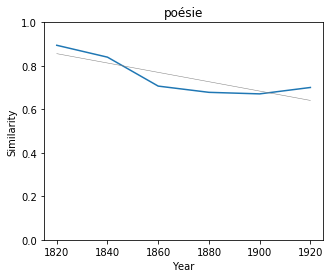

In [12]:
plot_cosine_series('littérature', 'poésie')
# plot_cosine_series('littérature', 'fiction')
# plot_cosine_series('littérature', 'polite')

In [13]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [14]:
union_vocab = union_neighbor_vocab('littérature')

In [15]:
data = []
for token in union_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [16]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [17]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
478,humanisme,0.008482,0.008984
114,apport,0.007154,0.002808
473,sociologie,0.006658,0.020203
229,adaptation,0.006378,0.004376
64,théoricien,0.006223,0.006676
233,mentalité,0.005986,0.049159
85,exégèse,0.005727,0.030800
317,classicisme,0.005619,0.033923
66,réaliste,0.005608,0.006002
409,vauquelin,0.005358,0.013316


humanisme


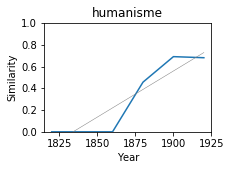

apport


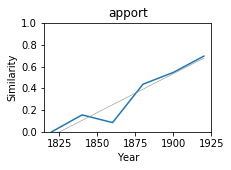

sociologie


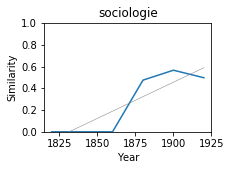

adaptation


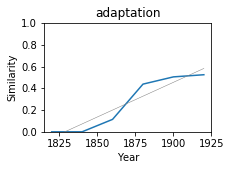

théoricien


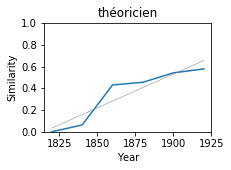

mentalité


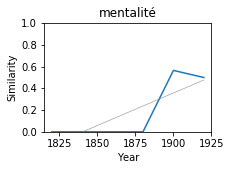

exégèse


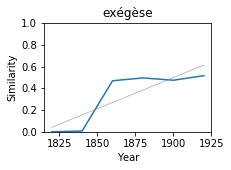

classicisme


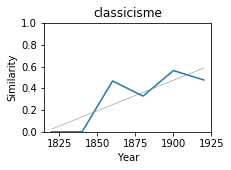

réaliste


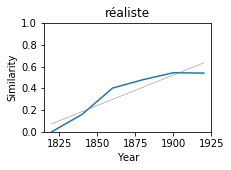

vauquelin


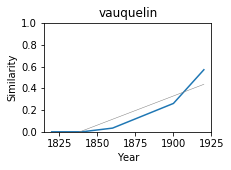

déambuler


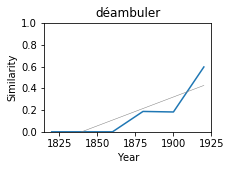

palestrina


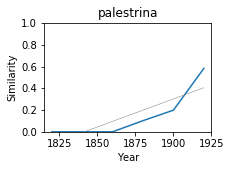

colonisation


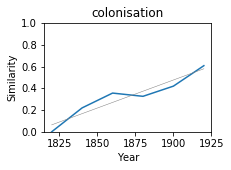

enquête


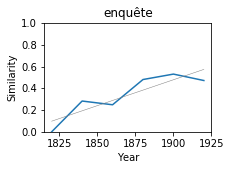

artistique


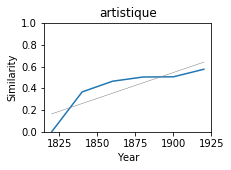

psychologue


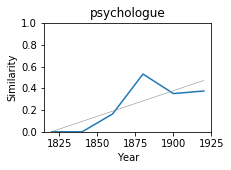

conscription


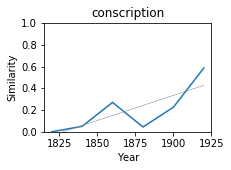

réalisme


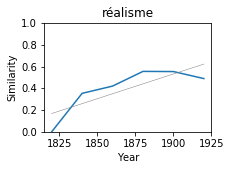

prédominance


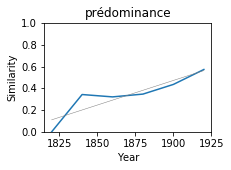

platement


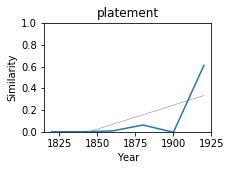

In [18]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

# Decreasing

In [19]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
123,alcée,-0.006189,0.044767
192,fétichisme,-0.005636,0.043468
445,transplantation,-0.005554,0.135493
537,replonger,-0.005385,0.157023
356,dosithée,-0.005183,0.158302
450,dépravation,-0.005179,0.027638
340,pélasges,-0.005051,0.022544
232,morceau,-0.004982,0.040018
413,scène,-0.004636,0.070260
535,acteur,-0.004381,0.164837


alcée


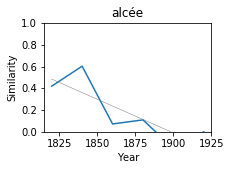

fétichisme


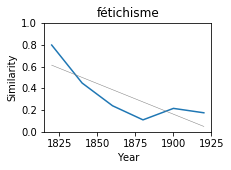

transplantation


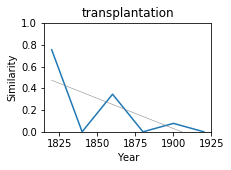

replonger


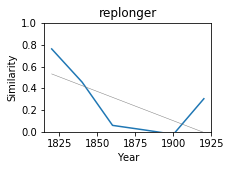

dosithée


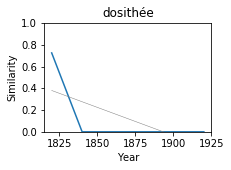

dépravation


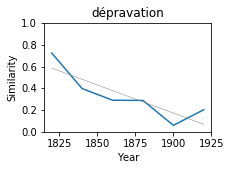

pélasges


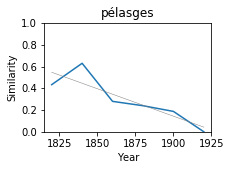

morceau


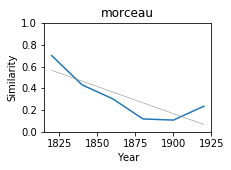

scène


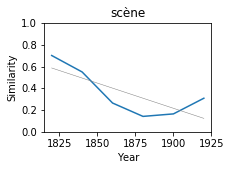

acteur


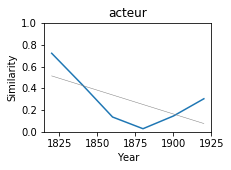

homère


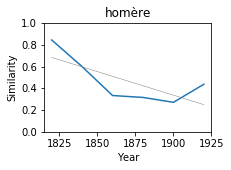

principal


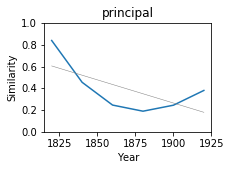

personnage


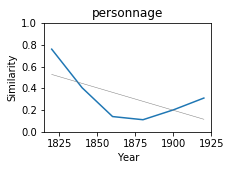

marche


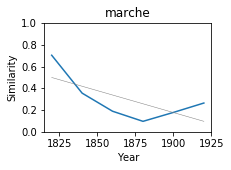

renfermer


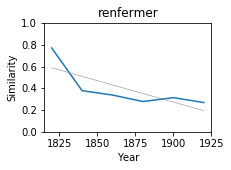

simonide


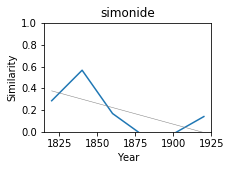

poème


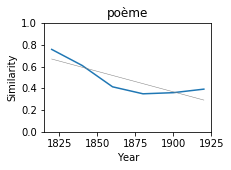

romance


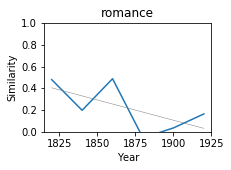

précéder


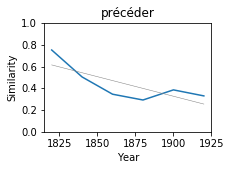

fable


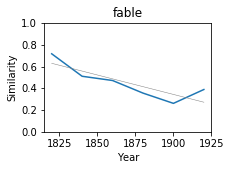

In [20]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

In [27]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [28]:
intersect_vocab = intersect_neighbor_vocab('littérature')

In [29]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('littérature', token)
    fit = lin_reg(series)
    
    if fit.pvalues[1] < 0.05:
        data.append((token, fit.params[1], fit.pvalues[1]))

In [30]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [31]:
df2.sort_values('slope', ascending=False)

,token,slope,p
2,psychologie,0.002063,0.003942
25,esthétique,0.001093,0.024281
11,antiquité,-0.000964,0.037281
5,goût,-0.001119,0.014623
8,étude,-0.001270,0.048744
13,comparaison,-0.001494,0.033097
15,établissement,-0.001538,0.037317
3,diplomatie,-0.001540,0.030690
17,orthographe,-0.001585,0.039836
18,spéculation,-0.001626,0.002111


psychologie


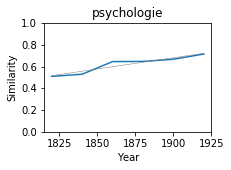

esthétique


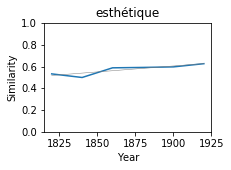

antiquité


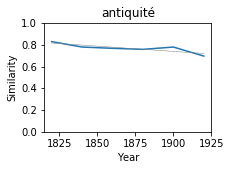

goût


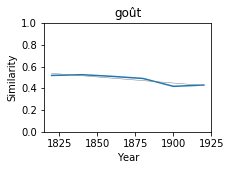

étude


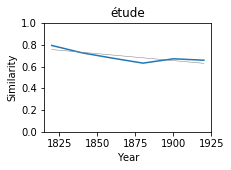

comparaison


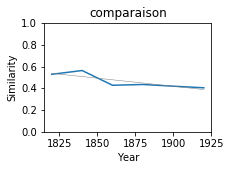

établissement


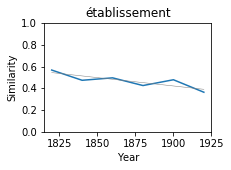

diplomatie


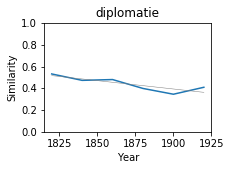

orthographe


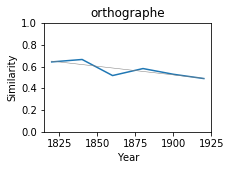

spéculation


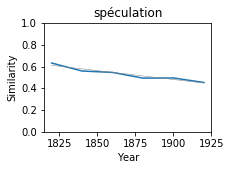

particulièrement


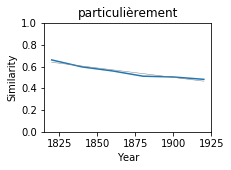

idiome


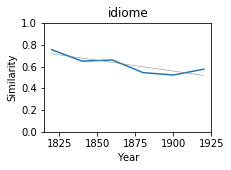

code


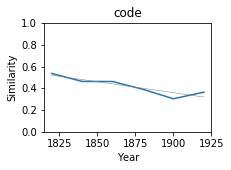

monument


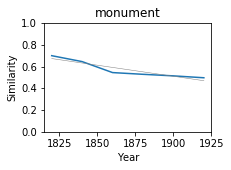

érudition


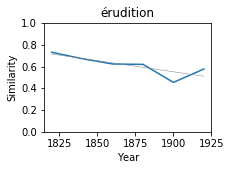

poésie


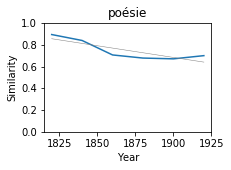

allemagne


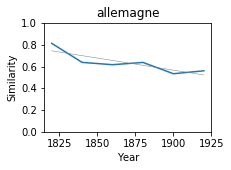

éloquence


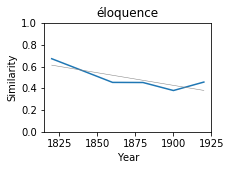

perfection


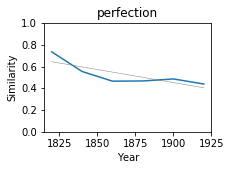

dériver


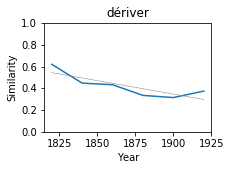

primitif


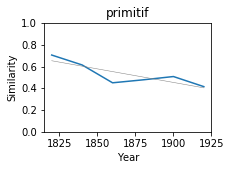

grèce


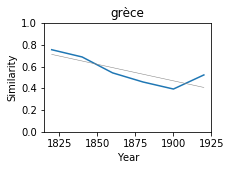

cours


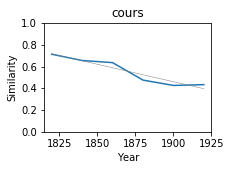

chevalerie


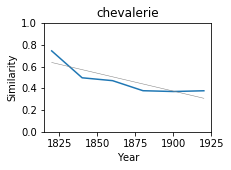

poète


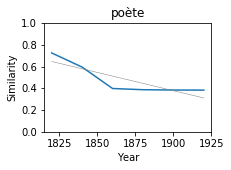

poème


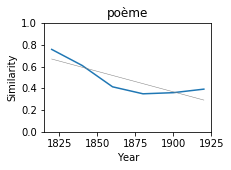

In [32]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)